# Project 7 -- [Adam] [ornelas]

## Question 1

In [2]:
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/death_records/DeathRecords.csv")
head(myDF)
#uploading the death data set 

Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,2,1,1,M,1,87,0,...,24,1,1,1,0,0,1,1,100,6
2,1,0,2,1,1,M,1,58,0,...,21,3,3,1,0,0,1,1,100,6
3,1,0,7,1,1,F,1,75,0,...,28,2,2,1,0,0,1,1,100,6
4,1,0,6,1,1,M,1,74,0,...,22,3,3,1,0,0,1,1,100,6
5,1,0,3,1,1,M,1,64,0,...,21,1,1,1,0,0,1,1,100,6
6,1,0,5,1,1,F,1,93,0,...,37,5,5,1,0,0,1,1,100,6


In [4]:
table(cut(myDF$Age, breaks=c(-Inf,18,25,35,55,150,Inf)))
#this code confirms that the ages are less than or equal to the correct amount and the correct values are in place 
    #"youth": less than or equal to 18 years old
    #"young adult": older than 18 but less than or equal to 25 years old
    #"adult": older than 25 but less than or equal to 35 years old
    #"middle age adult": older than 35 but less than or equal to 55 years old
   # "senior adult": greater than 55 years old but less than or equal to 150 years old (or any other upper threshhold that you like)
   # "unknown": age of 999 (you could use, say, ages 150 to Inf for this category)


 (-Inf,18]    (18,25]    (25,35]    (35,55]   (55,150] (150, Inf] 
     36033      27691      49540     271181    2246155        571 


           youth      young adult            adult middle age adult 
           36033            27691            49540           271181 
    senior adult           unkown 
         2246155              571 

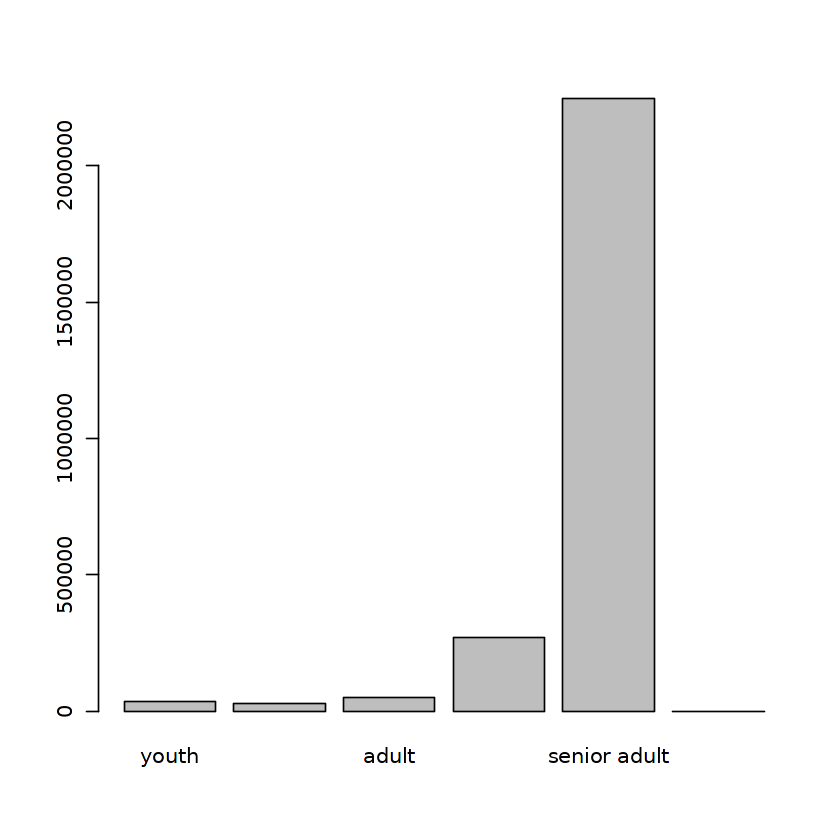

In [9]:
table(cut(myDF$Age, breaks=c(-Inf,18,25,35,55,150,Inf), labels=c("youth", "young adult","adult","middle age adult","senior adult","unkown")))
#Now we show the same code with labels indicating age group 
barplot(table(cut(myDF$Age, breaks=c(-Inf,18,25,35,55,150,Inf), labels=c("youth", "young adult","adult","middle age adult","senior adult","unkown"))))
#we then add this information into a bar plot

## Question 2

In [14]:
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv")
head(myDF)
#WE upload the transaction dataset

BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<int>,<int>
24,1809,03-JAN-16,5817389,-1.50,-1,SOUTH,1,2016
24,1809,03-JAN-16,5829886,-1.50,-1,SOUTH,1,2016
34,1253,03-JAN-16,539501,2.19,1,EAST,1,2016
60,1595,03-JAN-16,5260099,0.99,1,WEST,1,2016
60,1595,03-JAN-16,4535660,2.50,2,WEST,1,2016
168,3393,03-JAN-16,5602916,4.50,1,SOUTH,1,2016


In [16]:
tapply(myDF$SPEND, list(myDF$YEAR, myDF$STORE_R), sum) 
#We are looking at the spending sum for each year and region

,CENTRAL,EAST,SOUTH,WEST
2016,4471801,5829166,3996751,4754003
2017,4425505,5870281,3961170,4926104


Markdown notes and sentences and analysis written here.

## Question 3

In [26]:
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/beer/reviews_sample.csv")
head(myDF)

beer_id,username,date,text,look,smell,taste,feel,overall,score
<int>,<chr>,<IDate>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of 360. Served in a DFH snifter, the beer pours dark brown/black with about an inch tan head that stuck around a little while. There's also a good amount of lacing. I like the aroma, the brew smells like dark fruit (raisin, plum), chocolate, roasted malt, and a bit of licorice. For the most part I think the taste is just like the aroma, but with some coffee flavor noticeable too. Mouthfeel/body is medium/full, it's creamy and coating with a moderate amount of carbonation. I think it's a good overall brew, worth picking up if you want a nice straight forward imperial stout. Here's hoping Four String brings this back in the future! $9.99 a bottle.",4.00,4.00,4.00,4.25,4.00,4.03
125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
125646,GratefulBeerGuy,2017-12-20,"0% 16 oz can. Funny story: As I finally walked in the doors after a 45 min wait in line and freezing temps the sweet sound of the Grateful Dead's Sugar Magnolia greeted me from the TreeHouse sound system. The bottom of the can reads: """"Going where the wind goes, bloomin' like a red rose"""" A white haze to the yellow and golden liquid. Thick and healthy, totally unfiltered. Brawny white foam cap, thick, all-white clumps. Huge lacing left over. The aroma has a very zesty citrus hop effect, mellon and mango, grainy earthiness, tropical fruit blend with a bitter to sweet effect, then a peppery kick at the end. Very aromatic. The flavor is just bursting with complex hops, zesty earthy tones, sweet orange, peppery malt, clean fresh feel and overall vibe. A crispy bite wakes you up, full and lush mouthfeel follows from a totally unfiltered expereince. The feel and flavor finishes with a fun, earthy, zesty dry bite. Tropical juicy, zesty citrus, zippy golden wheat malt, melons, rustic earthiness sums up the taste pretty well. Levels of complexity are deep. It's an interesting ride for sure. Overall, this one stands somewhere near the top of the New England IPA's.",4.75,4.75,4.50,4.50,4.50,4.58
125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouquet. Strong flavor but smoother than 8.2%. Maybe peach nose but overall a general citrus punch.,4.25,4.50,4.25,4.25,4.25,4.31
125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91


In [27]:
tapply(myDF$score, list(year(myDF$date), month(myDF$date)), mean) 
#this is the mean score for each month and year. the columns are years and the rows are months

,1,2,3,4,5,6,7,8,9,10,11,12
1998,3.770000,3.396667,4.092000,3.840000,3.702000,4.700000,3.100000,3.823333,3.355000,3.910000,NA,3.930000
1999,NA,3.613333,NA,NA,3.820000,3.850000,3.880000,NA,NA,3.500000,3.880000,4.000000
2000,NA,4.300000,NA,3.880000,NA,4.470000,3.995000,NA,3.885000,3.880000,4.670000,3.400000
2001,4.220000,4.488000,4.403333,3.053333,NA,4.012000,4.080000,3.905455,4.010556,3.948000,4.112069,3.851053
2002,4.246667,3.706000,3.933846,3.831224,3.887788,3.782655,3.950776,3.628201,3.798758,3.784247,3.885028,3.832537
2003,3.842596,3.921875,3.840573,3.929500,3.895977,3.768022,3.742609,3.710635,3.761452,3.771104,3.790879,3.802826
2004,3.892104,3.822910,3.757987,3.825360,3.826656,3.798576,3.816569,3.861793,3.802122,3.784444,3.741100,3.843094
2005,3.872065,3.805870,3.884944,3.806607,3.743355,3.859615,3.769045,3.784184,3.795644,3.782152,3.855852,3.860837
2006,3.821626,3.789613,3.803201,3.833529,3.816436,3.847766,3.799106,3.795228,3.826782,3.764831,3.802075,3.804746
2007,3.796619,3.820563,3.785231,3.820230,3.768441,3.721336,3.809563,3.710408,3.769330,3.826076,3.779580,3.834992


## Question 4

In [29]:
# code herelibrary(data.table)
myDF <- fread("/anvil/projects/tdm/data/election/itcont1980.txt", quote="")
names(myDF) <- c("CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID")

In [42]:
x <- subset(myDF, STATE=="IN")
 tail(sort(table(x$CITY)), n=41)
#we take a subset that looks at all states correlating to IN
#Within that subset we look at how many times each city makes a donation


    CHESTERTON    INDIANPOLIS     PLAINFIELD      WALKERTON       HIGHLAND 
            15             15             15             15             16 
 MICHIGAN CITY      MISHAWAKA         HOBART      VINCENNES         WARSAW 
            16             16             17             20             21 
       HAMMOND    NOBLESVILLE    W LAFAYETTE       SYRACUSE WEST LAFAYETTE 
            22             22             22             24             24 
        WABASH        MUNSTER         MUNICE       ANDERSON     VALPARAISO 
            27             30             31             34             34 
   CROWN POINT      GREENWOOD    BLOOMINGTON       RICHMOND       COLUMBUS 
            35             35             38             43             45 
        KOKOMO   MERRILLVILLE           GARY     ZIONSVILLE        LAPORTE 
            45             46             47             52             53 
   TERRE HAUTE      LAFAYETTE         INDPLS     SOUTH BEND        ELKHART 
           

In [49]:
tail(sort(table(myDF$CITY[myDF$STATE=="IN"])),n=41)
#here we do the same thing while using indexing instead of a subset


    CHESTERTON    INDIANPOLIS     PLAINFIELD      WALKERTON       HIGHLAND 
            15             15             15             15             16 
 MICHIGAN CITY      MISHAWAKA         HOBART      VINCENNES         WARSAW 
            16             16             17             20             21 
       HAMMOND    NOBLESVILLE    W LAFAYETTE       SYRACUSE WEST LAFAYETTE 
            22             22             22             24             24 
        WABASH        MUNSTER         MUNICE       ANDERSON     VALPARAISO 
            27             30             31             34             34 
   CROWN POINT      GREENWOOD    BLOOMINGTON       RICHMOND       COLUMBUS 
            35             35             38             43             45 
        KOKOMO   MERRILLVILLE           GARY     ZIONSVILLE        LAPORTE 
            45             46             47             52             53 
   TERRE HAUTE      LAFAYETTE         INDPLS     SOUTH BEND        ELKHART 
           

In [ ]:
#One weird thing about the data set Muncie has significantly more donation from all the other cities
#It is the only city with over 200 donations

## Question 5

In [2]:
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/flights/subset/1990.csv")
head(myDF)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,...,<lgl>,<lgl>,<int>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1990,1,3,3,1707,1630,1755,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1990,1,4,4,1706,1630,1807,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1990,1,5,5,1629,1630,1715,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1990,1,6,6,1633,1630,1718,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1990,1,8,1,1630,1630,1726,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1990,1,9,2,1734,1630,1818,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA


In [3]:
table(cut(myDF$DepDelay, breaks=c(-Inf,seq(0,1440,by=60)),dig.lab=4), useNA="always")


   (-Inf,0]      (0,60]    (60,120]   (120,180]   (180,240]   (240,300] 
    2966433     2111783      104240       24000        7517        2630 
  (300,360]   (360,420]   (420,480]   (480,540]   (540,600]   (600,660] 
       1001         366         125          65          35          19 
  (660,720]   (720,780]   (780,840]   (840,900]   (900,960]  (960,1020] 
         24          20          24          13           8           6 
(1020,1080] (1080,1140] (1140,1200] (1200,1260] (1260,1320] (1320,1380] 
          1           4           3           3          11          28 
(1380,1440]        <NA> 
         76       52458 

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.